In [828]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn import metrics
from xgboost import XGBRegressor,DMatrix
import xgboost as xgb


In [829]:
# !unzip "/content/archive (7).zip" -d "sales"

In [830]:
# read data
df_train=pd.read_csv("/content/sales/Train.csv")
df_test=pd.read_csv("/content/sales/Test.csv")

In [831]:
print(df_train.shape)
print(df_test.shape)

(8523, 12)
(5681, 11)


In [832]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [833]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [834]:
df_train.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [835]:
df_train.Outlet_Size.value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [836]:
sns.set()

# EDA

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

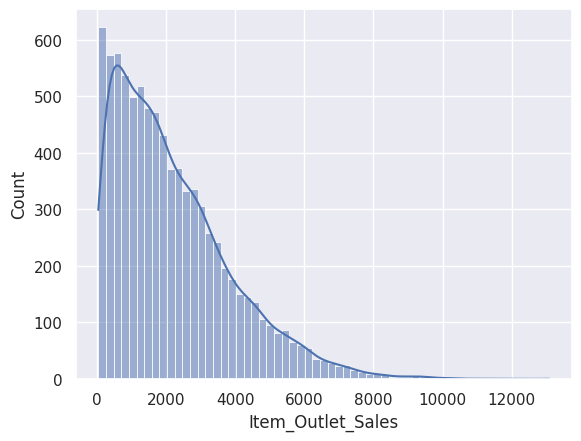

In [837]:
sns.histplot(x=df_train.Item_Outlet_Sales,kde=True)

In [838]:
df_train.Item_Identifier.value_counts().sum()

8523

In [839]:
df_train.Item_Weight.isna().sum()

1463

<Axes: xlabel='Item_Weight', ylabel='Density'>

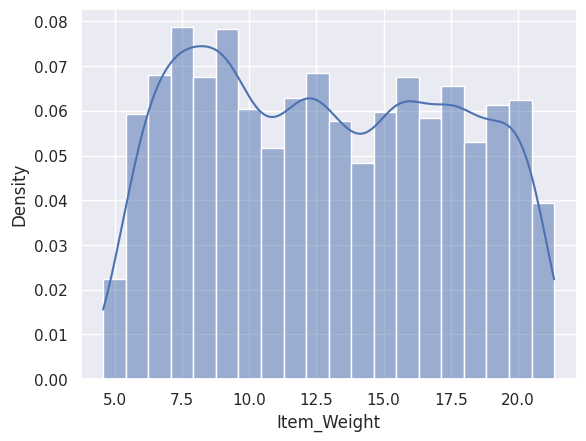

In [840]:
sns.histplot(data=df_train,x=df_train.Item_Weight,kde=True,stat="density")

In [841]:
df_train.loc[df_train["Item_Weight"].isna(),["Item_Weight"]]=df_train.Item_Weight.mean()

In [842]:
df_train.Item_Weight.isna().sum()


0

In [843]:
df_train.Item_Fat_Content.value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [844]:
df_train.replace({"Item_Fat_Content":{"Low Fat":"low fat","LF":"low fat","reg":"regular","Regular":"regular"}},inplace=True)

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

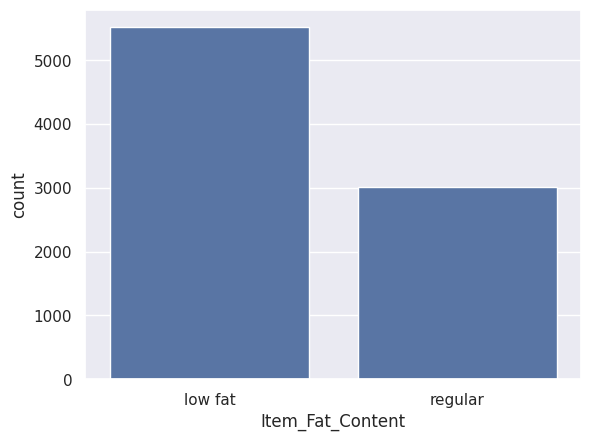

In [845]:
sns.countplot(data=df_train,x=df_train.Item_Fat_Content)

<Axes: xlabel='Item_Visibility', ylabel='Count'>

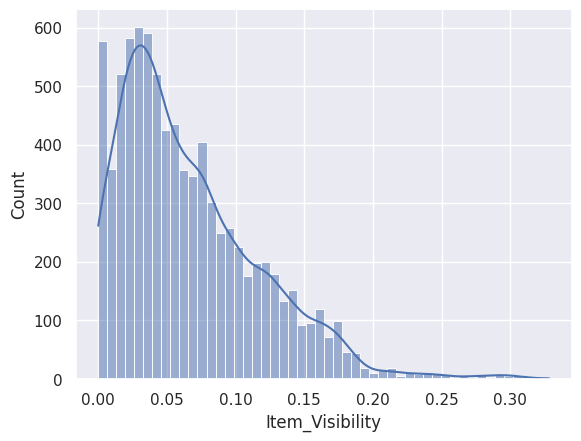

In [846]:
sns.histplot(data=df_train,x=df_train.Item_Visibility,kde=True)

In [847]:
df_train.Item_Type.value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


<Axes: xlabel='Item_Type', ylabel='count'>

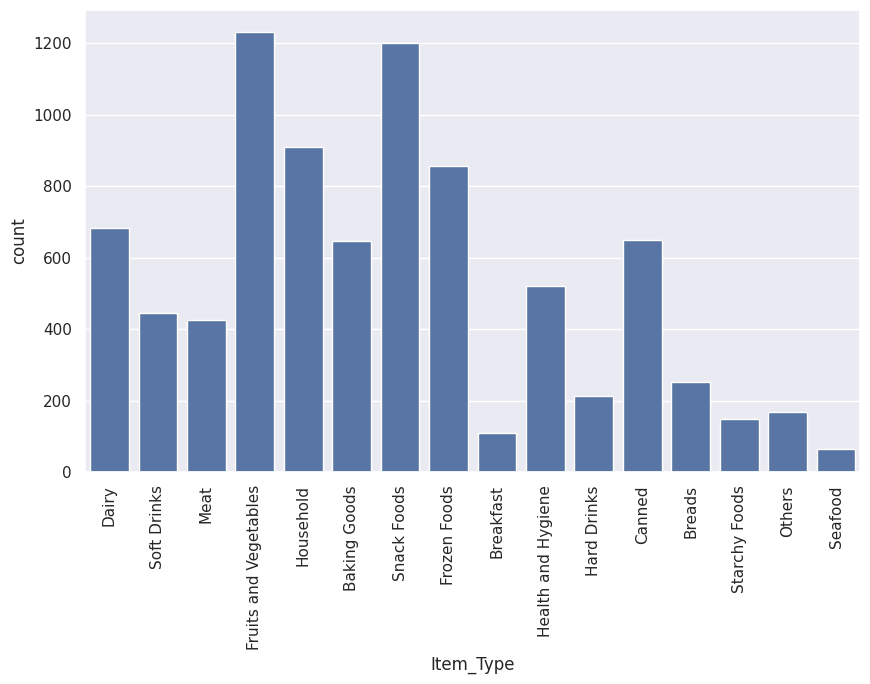

In [848]:
plt.figure(figsize=[10,6])
plt.xticks(rotation=90)
sns.countplot(data=df_train,x=df_train.Item_Type)

<Axes: xlabel='Item_MRP', ylabel='Density'>

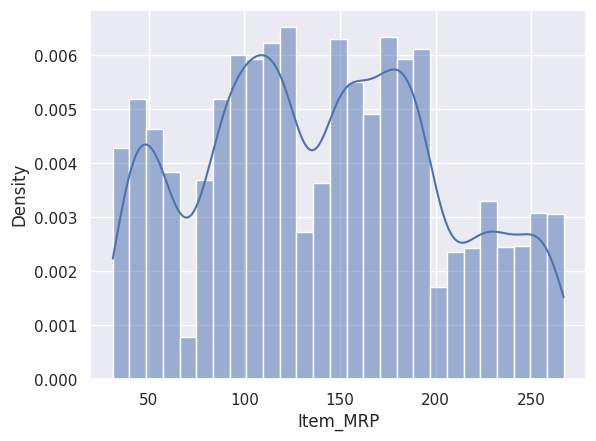

In [849]:
sns.histplot(data=df_train,x=df_train.Item_MRP,kde=True,stat="density")

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

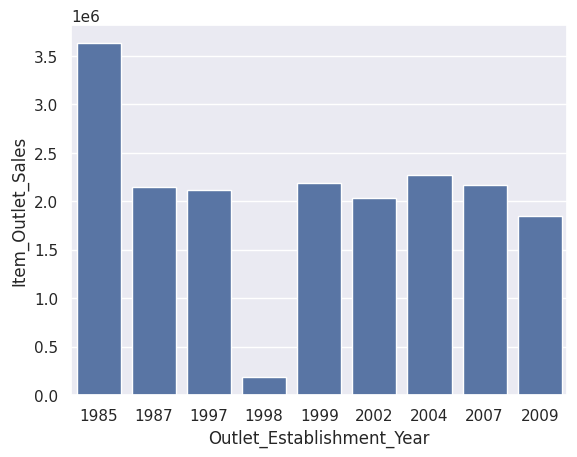

In [850]:
df_train.Outlet_Establishment_Year.unique()
sns.barplot(df_train.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].sum())

<Axes: xlabel='Outlet_Size', ylabel='count'>

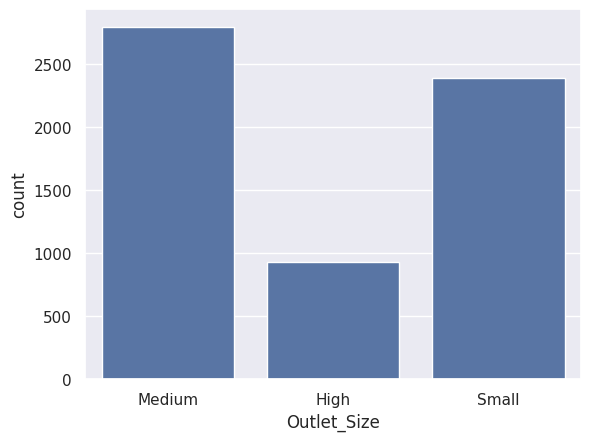

In [851]:
sns.countplot(x=df_train.Outlet_Size)

In [852]:
pivot=df_train.pivot_table(columns="Outlet_Type",values="Outlet_Size",aggfunc=(lambda x :x.mode()))


In [853]:
for i in df_train[df_train.Outlet_Size.isna()].itertuples():
    df_train.loc[i.Index, "Outlet_Size"] = pivot[i.Outlet_Type].values[0]


<Axes: xlabel='Outlet_Size', ylabel='count'>

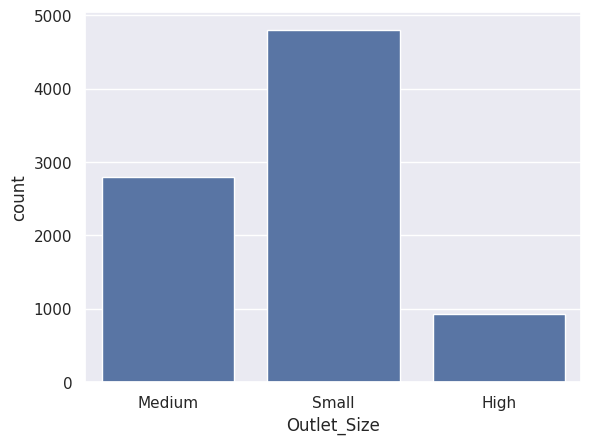

In [854]:
sns.countplot(x=df_train.Outlet_Size)

In [855]:
df_train.select_dtypes(include="O").columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [856]:
df_train.drop(columns=['Item_Identifier','Outlet_Identifier'],inplace=True)

In [857]:
df_train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [858]:
df_train.Outlet_Size

,Outlet_Size
0,Medium
1,Medium
2,Medium
3,Small
4,High
...,...
8518,High
8519,Small
8520,Small
8521,Medium


In [859]:
label=df_train["Item_Outlet_Sales"]
x=df_train.drop(columns=['Item_Outlet_Sales'])

In [860]:
print(x.shape)
print(label.shape)

(8523, 9)
(8523,)


In [861]:
encoder=LabelEncoder()
OHE=OneHotEncoder(sparse=False,drop="first")

In [862]:
x.Item_Fat_Content=encoder.fit_transform(x.Item_Fat_Content)
x.Outlet_Size=encoder.fit_transform(x.Outlet_Size)

In [863]:
ohe_data=OHE.fit_transform(x[['Item_Type', 'Outlet_Location_Type', 'Outlet_Type']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [864]:
ohe_data=pd.DataFrame(ohe_data,columns=OHE.get_feature_names_out(['Item_Type', 'Outlet_Location_Type', 'Outlet_Type']))

In [865]:
x.drop(columns=['Item_Type', 'Outlet_Location_Type', 'Outlet_Type'],inplace=True)

In [866]:
x=pd.concat([x,ohe_data],axis=1)

In [867]:
x_train,x_test,y_train,y_test=train_test_split(x,label,test_size=0.2,random_state=2,shuffle=True)

In [868]:
print(x_train.shape)
print(x_test.shape)

(6818, 26)
(1705, 26)


In [869]:
# xgb_parms = {
#     'max_depth':4,
#     'learning_rate':0.1,
#     'subsample':1,
#     'colsample_bytree':0.9,
#     'eval_metric':'rmse',
#     'objective':'reg:squarederror',
#     'random_state':42
# }

In [870]:
# dtrain=DMatrix(x_train,y_train)
# dtest=DMatrix(x_test,y_test)

In [912]:
xgb=XGBRegressor(max_depth=3)

In [913]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [873]:
# dtrain_eval=DMatrix(x_train)
# dtest_eval=DMatrix(x_test)

In [914]:
# Evaluation
train_pred=xgb.predict(x_train)
r2_score=metrics.r2_score(y_train,train_pred)
print(f"the model represent {r2_score} of the training dataset Variance ")

the model represent 0.6676924108091808 of the training dataset Variance 


In [915]:
test_pred=xgb.predict(x_test)
r2_score=metrics.r2_score(y_test,test_pred)
print(f"the model represent {r2_score} of the testing dataset Variance ")

the model represent 0.5768681965249949 of the testing dataset Variance 
